In [1]:
import gym
from spinup import ppo_pytorch as ppo
from PowerComputingEnv import PwrCptingEnv

import numpy as np
import torch
import torch.nn as nn
import pandas as pd

import matplotlib.pyplot as plt
import time

/Users/alfred/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple sklearn

In [2]:
# import pandapower as pp
env = PwrCptingEnv()
# try:
#     pp.rundcopp(Env.net)
# except BaseException as t:
#     print(t)
# finally:
#     print('load', Env.net.load['p_mw'].sum())
#     print('gen_max', Env.net.gen['max_p_mw'].sum())
#     print('gen', Env.net.gen['p_mw'].sum())
#     print('ext_grid', Env.net.ext_grid['max_p_mw'].sum())
#     print(Env.net.res_gen)
#     print('--------------')

/Users/alfred/Applications/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
res_r = []
res_a = []
res_ext = []
action = [0.2, 0.2, 0.2, 0.2, 0.2]
res_sgens = []
d = False
while not d:
    print(env.time_step)
    o, r, d, (opf_r, opf_a, res_e) = env.step(action)
    res_sgens.append(env.net.res_sgen)
    res_ext.append(res_e)
    res_r.append(opf_r)
    res_a.append(opf_a)

In [4]:
res_a

In [4]:
sum(res_r)

16196.319345254218

In [9]:
pd.DataFrame(np.transpose(np.array(res_a), [1,0])).to_excel('xinnengyuan.xlsx')

In [10]:
data22 = [[23.16,24.00,25.53,26.80,22.50,28.64,34.10,39.49,43.36,45.09,45.40,45.84,46.93,50.26,52.69,55.63,54.50,56.80,56.13,57.45,50.86,46.18,40.06,38.52],
[12.48,18.22,13.15,13.50,4.61,14.02,15.55,17.06,18.14,18.63,10.20,18.83,19.14,20.07,20.75,26.89,23.49,28.75,26.76,30.30,16.03,8.90,2.22,2.78],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.05,4.69,2.50,6.25,8.54,15.54,20.62,21.50,22.20,22.40,22.80,22.40,21.00,17.00,15.00,14.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.64,5.35,6.56,3.49,7.09,7.85,10.18,11.88,13.94,13.15,14.76,14.29,15.21,10.60,7.33,3.04,1.96],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.64,5.35,6.56,3.49,7.09,7.85,10.18,11.88,13.94,13.15,14.76,14.29,15.21,10.60,7.33,3.04,1.96]]


9


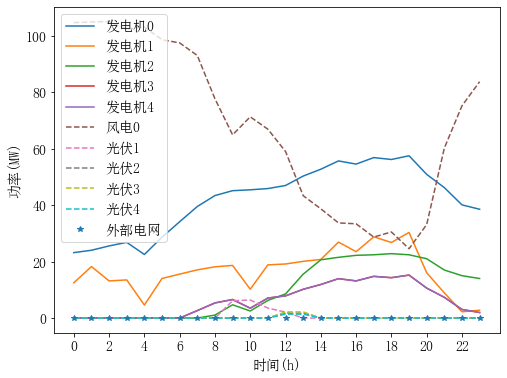

In [13]:
print(env.day_of_year)
fig, ax = plt.subplots(figsize=[8,6])
for inx, i in enumerate(data22):
    ax.plot(i, label='发电机' + str(inx))
    
for inx, i in enumerate(np.transpose(np.array(list(map(lambda x: x['p_mw'].values, res_sgens))), [1,0])):
    if inx == 0:
        ax.plot(i, '--', label='风电' + str(inx))
    else:
        ax.plot(i, '--', label='光伏' + str(inx))
    
ax.plot(res_ext, '*', label='外部电网')
plt.legend(fontsize=14)
plt.xticks(ticks=range(0,24,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'时间(h)', fontsize=14)
plt.ylabel(u'功率(MW)', fontsize=14)
# fig.subplots_adjust(left=0.15)
plt.savefig('新能源适应性', dpi=300, bbox_inches='tight')

In [27]:
pd.DataFrame(np.transpose(np.array(res_a), [1,0])).to_excel('datum.xlsx')

In [14]:
fw_data = [[29.3,	33.60,	33.80,	38.00,	38.00,	38.82,	48.07,	56.83,	60.57,	61.20,	62.74,	62.74,	61.40,	61.44,	61.44,	58.70,	50.50,	50.25,	46.15,	41.77,	39.00,	38.35,	37.63,	35.69],
[19.6,	19.14,	12.57,	14.73,	8.19,	9.67,	15.71,	21.91,	34.58,	33.30,	35.87,	35.92,	19.90,	26.71,	19.56,	25.36,	18.39,	20.07,	18.92,	14.70,	15.97,	16.74,	16.54,	15.99],
[0.00,	0.00,	0.00,	3.00,	3.00,	6.70,	14.70,	29.33,	38.70,	38.70,	46.31,	46.94,	39.60,	38.99,	33.01,	33.00,	20.23,	15.52,	6.90,	3.00,	0.00,	0.00,	0.00,	0.00],
[0.00,	0.00,	0.00,	0.00,	0.00,	2.67,	8.65,	14.78,	16.00,	16.00,	16.00,	16.00,	16.00,	16.50,	16.01,	15.00,	13.60,	10.18,	7.30,	4.24,	1.78,	1.84,	1.34,	0.00],
[0.00,	0.00,	0.00,	0.00,	0.00,	2.17,	8.65,	14.78,	16.00,	16.00,	16.00,	16.00,	16.00,	16.00,	16.01,	14.00,	14.20,	10.18,	7.30,	4.24,	1.78,	1.84,	1.34,	0.00]]

In [17]:
res_ext

[5.7829652830431516e-08,
 6.51383822715556e-08,
 5.95524876847778e-08,
 6.158600545202593e-08,
 7.165032723430139e-08,
 6.566199721290074e-08,
 2.0600575071249015e-07,
 4.913853052868295e-07,
 6.736993102296493e-08,
 2.8669232587704094e-07,
 5.004724785356687e-07,
 2.617475648961017e-07,
 2.4667748664242025e-07,
 2.1131256533070193e-07,
 2.2312423809642673e-07,
 3.07836508031943e-07,
 2.6928140316689354e-07,
 3.6917453030089865e-07,
 3.326197669586824e-07,
 4.1341169089698755e-07,
 2.022745812417328e-07,
 2.5196915049017795e-07,
 4.818228035492145e-07,
 5.668897888988314e-08]

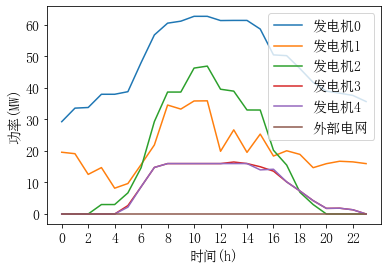

In [16]:
for inx, i in enumerate(fw_data):
    plt.plot(i, label='发电机' + str(inx))
    
plt.plot(res_ext, label='外部电网')
plt.legend(fontsize=14)
plt.xticks(ticks=range(0,24,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'时间(h)', fontsize=14)
plt.ylabel(u'功率(MW)', fontsize=14)
# fig.subplots_adjust(left=0.15)
plt.savefig('RL时序策略', dpi=300, bbox_inches='tight')

In [11]:
env.net.poly_cost

element        et  cp0_eur  cp1_eur_per_mw  cp2_eur_per_mw2  cq0_eur  \
0       0  ext_grid      0.0            4.00          0.05000      0.0   
1       0       gen      0.0            1.75          0.01750      0.0   
2       1       gen      0.0            1.00          0.06250      0.0   
3       2       gen      0.0            3.25          0.00834      0.0   
4       3       gen      0.0            3.00          0.02500      0.0   
5       4       gen      0.0            3.00          0.02500      0.0   

   cq1_eur_per_mvar  cq2_eur_per_mvar2  
0               0.0                0.0  
1               0.0                0.0  
2               0.0                0.0  
3               0.0                0.0  
4               0.0                0.0  
5               0.0                0.0

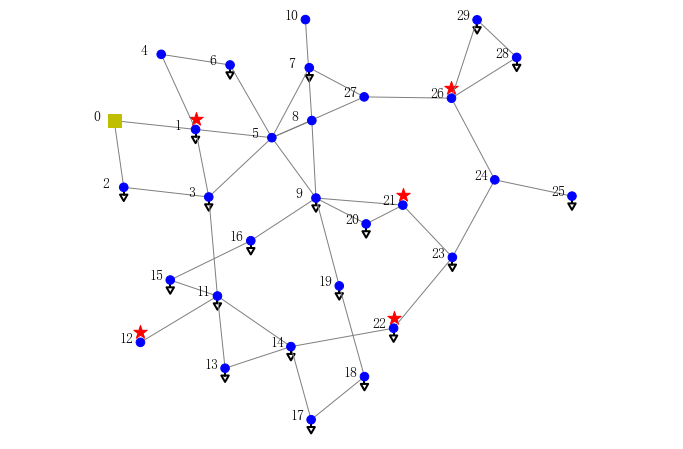

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe72d2d38d0>)

In [4]:
env.render()

In [18]:
t = int(time.time())
ppo(PwrCptingEnv,
    epochs=300,
    steps_per_epoch=1,
    vf_lr=0.001,
    train_v_iters=60,
    ac_kwargs={'hidden_sizes':(128, 128, 128), 'activation':nn.ReLU},
    pi_lr=1e-3,
    logger_kwargs={'output_dir': 'Trytest/{}'.format(t)})

Logging data to Trytest/1616916278/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            128,
            128,
            128
        ]
    },
    "actor_critic":	"GridActorCritic",
    "clip_ratio":	0.2,
    "env_fn":	"PwrCptingEnv",
    "epochs":	300,
    "gamma":	0.99,
    "lam":	0.97,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f35ee005f10>":	{
            "epoch_dict":	{},
            "exp_name":	null,
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"Trytest/1616916278",
            "output_file":	{
                "<_io.TextIOWrapper name='Trytest/1616916278/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "output_dir":	"Trytest/1616916278"
    },
    "max_ep_len":	1000,
    "pi_lr":	0.001,
    "save_freq":	10,


/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
/home/yixuan/anaconda3/envs/py3_7_spinningup/lib/python3.7/site-packages/simbench/converter/csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__. 


Number of parameters: 	 pi: 37642, 	 v: 37121

Load:  60.38249385
OPF: 
0    38.948688
1    16.905633
2     0.000003
3     2.264085
4     2.264085
Name: p_mw, dtype: float64
Cost:  143.31669261241404
RL: 
0    28.462954
1     8.773960
2    16.004155
3     6.498863
4    20.878384
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  225.8079186218065
Early stopping at step 4 due to reaching max kl.
---------------------------------------
|             Epoch |               0 |
|      AverageEpRet |        1.77e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.77e+03 |
|          MinEpRet |        1.77e+03 |
|             EpLen |               1 |
|               OPF |        1.86e+03 |
|      AverageVVals |            -2.2 |
|          StdVVals |               0 |
|          MaxVVals |            -2.2 |
|          MinVVals |            -2.2 |
| TotalEnvInteracts |               1 |
|            LossPi |       -1.78e+03 |
|             LossV |    

Load:  53.105924249999994
OPF: 
0    3.623354e+01
1    1.614539e+01
2    9.543848e-07
3    3.634931e-01
4    3.634934e-01
Name: p_mw, dtype: float64
Cost:  121.00899070740368
RL: 
0     7.245806
1    11.658198
2    66.275468
3     2.778360
4     3.450249
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  304.95635387396925
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |               7 |
|      AverageEpRet |         1.7e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.7e+03 |
|          MinEpRet |         1.7e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.82e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.82e+03 |
|          MinVVals |        1.82e+03 |
| TotalEnvInteracts |               8 |
|            LossPi |             128 |
|             LossV |        1.64e+04 |
|       De

Load:  124.57663185000001
OPF: 
0    54.099478
1    21.147854
2    23.590031
3    12.869634
4    12.869635
Name: p_mw, dtype: float64
Cost:  361.80001515618886
RL: 
0    11.012683
1     1.127438
2    37.967322
3    -1.887837
4     5.071536
Name: p_mw, dtype: float64
Cost:  707.5237444154786
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |              14 |
|      AverageEpRet |        1.29e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.29e+03 |
|          MinEpRet |        1.29e+03 |
|             EpLen |               1 |
|               OPF |        1.64e+03 |
|      AverageVVals |        1.43e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.43e+03 |
|          MinVVals |        1.43e+03 |
| TotalEnvInteracts |              15 |
|            LossPi |             136 |
|             LossV |        1.86e+04 |
|       DeltaLossPi |           -27.3 |
|        DeltaLossV

Load:  117.5511558
OPF: 
0    52.629196
1    20.736175
2    20.504908
3    11.840438
4    11.840438
Name: p_mw, dtype: float64
Cost:  336.38358657098803
RL: 
0   -10.957971
1    -6.793717
2    44.997518
3    -2.692562
4     5.203422
Name: p_mw, dtype: float64
Cost:  887.1063931422417
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |              21 |
|      AverageEpRet |        1.11e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.11e+03 |
|          MinEpRet |        1.11e+03 |
|             EpLen |               1 |
|               OPF |        1.66e+03 |
|      AverageVVals |        1.46e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.46e+03 |
|          MinVVals |        1.46e+03 |
| TotalEnvInteracts |              22 |
|            LossPi |             345 |
|             LossV |        1.19e+05 |
|       DeltaLossPi |           -68.9 |
|        DeltaLossV |     

Load:  89.2483467
OPF: 
0    46.706026
1    19.077687
2     8.076196
3     7.694219
4     7.694219
Name: p_mw, dtype: float64
Cost:  237.6530180553258
RL: 
0     3.949157
1   -16.516319
2    51.375210
3    12.290795
4     8.019488
Name: p_mw, dtype: float64
Cost:  428.92525887873586
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |              28 |
|      AverageEpRet |        1.57e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.57e+03 |
|          MinEpRet |        1.57e+03 |
|             EpLen |               1 |
|               OPF |        1.76e+03 |
|      AverageVVals |        1.61e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.61e+03 |
|          MinVVals |        1.61e+03 |
| TotalEnvInteracts |              29 |
|            LossPi |            36.8 |
|             LossV |        1.35e+03 |
|       DeltaLossPi |           -7.36 |
|        DeltaLossV |      

Load:  79.06971974999999
OPF: 
0    44.575857
1    18.481240
2     3.606420
3     6.203101
4     6.203101
Name: p_mw, dtype: float64
Cost:  203.58074639399135
RL: 
0    27.731452
1    11.434910
2    66.713764
3    35.771198
4    -6.754677
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  455.7138209216581
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |              35 |
|      AverageEpRet |        1.54e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.54e+03 |
|          MinEpRet |        1.54e+03 |
|             EpLen |               1 |
|               OPF |         1.8e+03 |
|      AverageVVals |        1.62e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.62e+03 |
|          MinVVals |        1.62e+03 |
| TotalEnvInteracts |              36 |
|            LossPi |            75.6 |
|             LossV |        5.72e+03 |
|       DeltaLossPi |      

Load:  135.73157400000002
OPF: 
0    56.433968
1    21.801511
2    28.488540
3    14.503776
4    14.503778
Name: p_mw, dtype: float64
Cost:  402.8985622618427
RL: 
0    34.667697
1     3.534576
2    54.455462
3    29.772475
4     6.333447
Name: p_mw, dtype: float64
Cost:  449.50774899358214
---------------------------------------
|             Epoch |              42 |
|      AverageEpRet |        1.55e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.55e+03 |
|          MinEpRet |        1.55e+03 |
|             EpLen |               1 |
|               OPF |         1.6e+03 |
|      AverageVVals |        1.46e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.46e+03 |
|          MinVVals |        1.46e+03 |
| TotalEnvInteracts |              43 |
|            LossPi |             -95 |
|             LossV |        9.02e+03 |
|       DeltaLossPi |             -19 |
|        DeltaLossV |       -9.01e+03 |
|           Entropy |       

Load:  182.82726060000002
OPF: 
0    66.644588
1    24.548375
2    48.839976
3    19.964979
4    22.001658
Name: p_mw, dtype: float64
Cost:  586.5020139100058
RL: 
0    79.756312
1     3.378020
2    50.092799
3    26.028088
4    13.368198
Name: p_mw, dtype: float64
Cost:  624.3269352657657
---------------------------------------
|             Epoch |              49 |
|      AverageEpRet |        1.38e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.38e+03 |
|          MinEpRet |        1.38e+03 |
|             EpLen |               1 |
|               OPF |        1.41e+03 |
|      AverageVVals |        1.37e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.37e+03 |
|          MinVVals |        1.37e+03 |
| TotalEnvInteracts |              50 |
|            LossPi |           -1.71 |
|             LossV |            2.92 |
|       DeltaLossPi |          -0.342 |
|        DeltaLossV |           -2.92 |
|           Entropy |        

Load:  53.5456062
OPF: 
0    3.639761e+01
1    1.619133e+01
2    7.313025e-07
3    4.783330e-01
4    4.783330e-01
Name: p_mw, dtype: float64
Cost:  122.33728974632803
RL: 
0     4.528231
1     0.158614
2    55.718692
3    31.082997
4     4.776715
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  347.7246893940122
Early stopping at step 5 due to reaching max kl.
---------------------------------------
|             Epoch |              56 |
|      AverageEpRet |        1.65e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.65e+03 |
|          MinEpRet |        1.65e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.75e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.75e+03 |
|          MinVVals |        1.75e+03 |
| TotalEnvInteracts |              57 |
|            LossPi |            93.6 |
|             LossV |        8.75e+03 |
|       DeltaLossPi

Load:  52.788367199999996
OPF: 
0    36.115044
1    16.112212
2     0.000001
3     0.280552
4     0.280557
Name: p_mw, dtype: float64
Cost:  120.0512067544026
RL: 
0     4.533955
1    -1.635086
2    56.400766
3    24.792763
4     0.004879
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  306.4185439023511
---------------------------------------
|             Epoch |              63 |
|      AverageEpRet |        1.69e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.69e+03 |
|          MinEpRet |        1.69e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.68e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.68e+03 |
|          MinVVals |        1.68e+03 |
| TotalEnvInteracts |              64 |
|            LossPi |           -9.05 |
|             LossV |            81.9 |
|       DeltaLossPi |           -1.81 |
|        DeltaLossV |           -81.

Load:  132.43293930000002
OPF: 
0    55.743634
1    21.608218
2    27.039999
3    14.020543
4    14.020544
Name: p_mw, dtype: float64
Cost:  390.65037525431194
RL: 
0    66.483283
1     5.866818
2     6.102046
3    33.664316
4    -0.565974
Name: p_mw, dtype: float64
Cost:  454.8252755171273
---------------------------------------
|             Epoch |              70 |
|      AverageEpRet |        1.55e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.55e+03 |
|          MinEpRet |        1.55e+03 |
|             EpLen |               1 |
|               OPF |        1.61e+03 |
|      AverageVVals |        1.44e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.44e+03 |
|          MinVVals |        1.44e+03 |
| TotalEnvInteracts |              71 |
|            LossPi |            -103 |
|             LossV |        1.07e+04 |
|       DeltaLossPi |           -20.7 |
|        DeltaLossV |       -1.07e+04 |
|           Entropy |       

Load:  49.632340649999996
OPF: 
0    3.408776e+01
1    1.554457e+01
2    5.324303e-07
3    2.873113e-06
4    2.873241e-06
Name: p_mw, dtype: float64
Cost:  110.63485470971122
RL: 
0    32.137969
1    -5.602376
2    -6.941772
3    28.644918
4    -2.079300
Name: p_mw, dtype: float64
Cost:  163.32960517567213
Early stopping at step 2 due to reaching max kl.
---------------------------------------
|             Epoch |              77 |
|      AverageEpRet |        1.84e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.84e+03 |
|          MinEpRet |        1.84e+03 |
|             EpLen |               1 |
|               OPF |        1.89e+03 |
|      AverageVVals |         1.8e+03 |
|          StdVVals |               0 |
|          MaxVVals |         1.8e+03 |
|          MinVVals |         1.8e+03 |
| TotalEnvInteracts |              78 |
|            LossPi |           -40.5 |
|             LossV |        1.64e+03 |
|       DeltaLossPi |            14.3 |
|  

Load:  161.6515596
OPF: 
0    61.858464
1    23.320370
2    39.870876
3    18.300924
4    18.300925
Name: p_mw, dtype: float64
Cost:  501.9159538322191
RL: 
0    85.562801
1    13.300325
2     6.766271
3    30.003415
4     4.377494
Name: p_mw, dtype: float64
Cost:  560.6900911300271
Early stopping at step 4 due to reaching max kl.
---------------------------------------
|             Epoch |              84 |
|      AverageEpRet |        1.44e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.44e+03 |
|          MinEpRet |        1.44e+03 |
|             EpLen |               1 |
|               OPF |         1.5e+03 |
|      AverageVVals |         1.4e+03 |
|          StdVVals |               0 |
|          MaxVVals |         1.4e+03 |
|          MinVVals |         1.4e+03 |
| TotalEnvInteracts |              85 |
|            LossPi |           -40.5 |
|             LossV |        1.64e+03 |
|       DeltaLossPi |            3.54 |
|        DeltaLossV |      

Load:  63.63532754999999
OPF: 
0    40.162432
1    17.245481
2     0.000005
3     3.113705
4     3.113705
Name: p_mw, dtype: float64
Cost:  153.51252012053587
RL: 
0    71.651011
1    -1.462649
2   -15.066626
3    36.534641
4     2.238973
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  316.64534289105734
Early stopping at step 4 due to reaching max kl.
---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |        1.68e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.68e+03 |
|          MinEpRet |        1.68e+03 |
|             EpLen |               1 |
|               OPF |        1.85e+03 |
|      AverageVVals |        1.79e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.79e+03 |
|          MinVVals |        1.79e+03 |
| TotalEnvInteracts |              92 |
|            LossPi |             111 |
|             LossV |        1.23e+04 |
|       DeltaLossPi |     

Load:  62.08138845
OPF: 
0    39.582604
1    17.083129
2     0.000004
3     2.707826
4     2.707826
Name: p_mw, dtype: float64
Cost:  148.62454520864583
RL: 
0    77.788777
1    -1.121152
2   -16.413494
3    30.316079
4     0.228736
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  304.49724331506474
---------------------------------------
|             Epoch |              98 |
|      AverageEpRet |         1.7e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.7e+03 |
|          MinEpRet |         1.7e+03 |
|             EpLen |               1 |
|               OPF |        1.85e+03 |
|      AverageVVals |        1.69e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.69e+03 |
|          MinVVals |        1.69e+03 |
| TotalEnvInteracts |              99 |
|            LossPi |           -9.36 |
|             LossV |            87.7 |
|       DeltaLossPi |           -1.87 |
|        DeltaLossV |           -87.6 |
|

Load:  165.74888625
OPF: 
0    62.715949
1    23.560465
2    41.670147
3    18.901154
4    18.901167
Name: p_mw, dtype: float64
Cost:  518.0186614439099
RL: 
0    74.632053
1    18.798980
2     3.313266
3    37.402822
4    41.871114
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  596.4521941659999
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             105 |
|      AverageEpRet |         1.4e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.4e+03 |
|          MinEpRet |         1.4e+03 |
|             EpLen |               1 |
|               OPF |        1.48e+03 |
|      AverageVVals |         1.5e+03 |
|          StdVVals |               0 |
|          MaxVVals |         1.5e+03 |
|          MinVVals |         1.5e+03 |
| TotalEnvInteracts |             106 |
|            LossPi |            95.6 |
|             LossV |        9.14e+03 |
|       DeltaLossPi |           -

Load:  112.41792299999999
OPF: 
0    51.554921
1    20.435378
2    18.250734
3    11.088445
4    11.088445
Name: p_mw, dtype: float64
Cost:  318.04140584086485
RL: 
0    65.344734
1     2.769748
2    10.582041
3    29.360052
4     8.968723
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  366.19948267579366
Early stopping at step 60 due to reaching max kl.
---------------------------------------
|             Epoch |             112 |
|      AverageEpRet |        1.63e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.63e+03 |
|          MinEpRet |        1.63e+03 |
|             EpLen |               1 |
|               OPF |        1.68e+03 |
|      AverageVVals |        1.44e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.44e+03 |
|          MinVVals |        1.44e+03 |
| TotalEnvInteracts |             113 |
|            LossPi |            -194 |
|             LossV |        3.77e+04 |
|       DeltaLossPi |   

Load:  161.74212389999997
OPF: 
0    61.877417
1    23.325677
2    39.910646
3    18.314192
4    18.314192
Name: p_mw, dtype: float64
Cost:  502.2705472880163
RL: 
0    73.699784
1    17.431712
2    27.237071
3    20.294550
4    23.443382
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  510.40978433565203
---------------------------------------
|             Epoch |             119 |
|      AverageEpRet |        1.49e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.49e+03 |
|          MinEpRet |        1.49e+03 |
|             EpLen |               1 |
|               OPF |         1.5e+03 |
|      AverageVVals |        1.39e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.39e+03 |
|          MinVVals |        1.39e+03 |
| TotalEnvInteracts |             120 |
|            LossPi |             -98 |
|             LossV |         9.6e+03 |
|       DeltaLossPi |           -19.6 |
|        DeltaLossV |        -9.6e+

Load:  49.000297350000004
OPF: 
0    3.359398e+01
1    1.540631e+01
2    3.906075e-07
3    1.707156e-06
4    1.707158e-06
Name: p_mw, dtype: float64
Cost:  108.78016736384296
RL: 
0    61.952291
1    -6.953063
2    62.301901
3    30.347096
4     1.445283
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  524.9576494614087
Early stopping at step 3 due to reaching max kl.
---------------------------------------
|             Epoch |             126 |
|      AverageEpRet |        1.48e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.48e+03 |
|          MinEpRet |        1.48e+03 |
|             EpLen |               1 |
|               OPF |        1.89e+03 |
|      AverageVVals |        1.56e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.56e+03 |
|          MinVVals |        1.56e+03 |
| TotalEnvInteracts |             127 |
|            LossPi |            87.5 |
|             LossV |        7.66e+03 |
|       Del

Load:  59.6189217
OPF: 
0    3.866378e+01
1    1.682586e+01
2    2.921971e-07
3    2.064644e+00
4    2.064644e+00
Name: p_mw, dtype: float64
Cost:  140.94334304194066
RL: 
0    91.428328
1   -10.097149
2    48.377449
3    28.228108
4     1.080105
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  587.1792976375355
---------------------------------------
|             Epoch |             133 |
|      AverageEpRet |        1.41e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.41e+03 |
|          MinEpRet |        1.41e+03 |
|             EpLen |               1 |
|               OPF |        1.86e+03 |
|      AverageVVals |         1.4e+03 |
|          StdVVals |               0 |
|          MaxVVals |         1.4e+03 |
|          MinVVals |         1.4e+03 |
| TotalEnvInteracts |             134 |
|            LossPi |           -17.2 |
|             LossV |             295 |
|       DeltaLossPi |           -3.43 |
|        DeltaLossV |       

Load:  53.901311099999994
OPF: 
0    3.653034e+01
1    1.622849e+01
2    6.121561e-07
3    5.712400e-01
4    5.712400e-01
Name: p_mw, dtype: float64
Cost:  123.41373779835422
RL: 
0    82.255630
1    -9.850324
2    51.835113
3    29.803766
4     1.909103
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  566.8751604343624
---------------------------------------
|             Epoch |             140 |
|      AverageEpRet |        1.43e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.43e+03 |
|          MinEpRet |        1.43e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.42e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.42e+03 |
|          MinVVals |        1.42e+03 |
| TotalEnvInteracts |             141 |
|            LossPi |           -15.7 |
|             LossV |             246 |
|       DeltaLossPi |           -3.13 |
|        DeltaLossV 

Load:  78.84428055000002
OPF: 
0    44.528677
1    18.468030
2     3.507423
3     6.170075
4     6.170075
Name: p_mw, dtype: float64
Cost:  202.83469385308783
RL: 
0    81.414719
1    -5.708929
2    59.318039
3    26.033775
4     4.243218
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  585.1540942102483
Early stopping at step 2 due to reaching max kl.
---------------------------------------
|             Epoch |             147 |
|      AverageEpRet |        1.41e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.41e+03 |
|          MinEpRet |        1.41e+03 |
|             EpLen |               1 |
|               OPF |         1.8e+03 |
|      AverageVVals |        1.44e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.44e+03 |
|          MinVVals |        1.44e+03 |
| TotalEnvInteracts |             148 |
|            LossPi |            21.7 |
|             LossV |             473 |
|       DeltaLossPi |      

Load:  96.33013679999999
OPF: 
0    48.188093
1    19.492666
2    11.186047
3     8.731665
4     8.731665
Name: p_mw, dtype: float64
Cost:  261.80650492075415
RL: 
0    78.738208
1     9.141693
2    54.279977
3    14.742857
4    -2.706451
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  503.3598924214494
Early stopping at step 3 due to reaching max kl.
---------------------------------------
|             Epoch |             154 |
|      AverageEpRet |         1.5e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.5e+03 |
|          MinEpRet |         1.5e+03 |
|             EpLen |               1 |
|               OPF |        1.74e+03 |
|      AverageVVals |        1.42e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.42e+03 |
|          MinVVals |        1.42e+03 |
| TotalEnvInteracts |             155 |
|            LossPi |           -80.6 |
|             LossV |         6.5e+03 |
|       DeltaLossPi |      

Load:  54.6349467
OPF: 
0    3.680408e+01
1    1.630514e+01
2    4.647004e-07
3    7.628603e-01
4    7.628603e-01
Name: p_mw, dtype: float64
Cost:  125.63911305389658
RL: 
0    88.764601
1    -0.125480
2    58.806350
3     2.165754
4    -1.691534
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  514.6721241787374
Early stopping at step 10 due to reaching max kl.
---------------------------------------
|             Epoch |             161 |
|      AverageEpRet |        1.49e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.49e+03 |
|          MinEpRet |        1.49e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.56e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.56e+03 |
|          MinVVals |        1.56e+03 |
| TotalEnvInteracts |             162 |
|            LossPi |            71.8 |
|             LossV |        5.15e+03 |
|       DeltaLossP

Load:  66.1452615
OPF: 
0    4.109898e+01
1    1.750771e+01
2    8.644600e-07
3    3.769285e+00
4    3.769285e+00
Name: p_mw, dtype: float64
Cost:  161.47421744803324
RL: 
0    83.077011
1     1.164538
2    52.994780
3     4.669749
4    -2.220406
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  471.0873143982803
---------------------------------------
|             Epoch |             168 |
|      AverageEpRet |        1.53e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.53e+03 |
|          MinEpRet |        1.53e+03 |
|             EpLen |               1 |
|               OPF |        1.84e+03 |
|      AverageVVals |        1.45e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.45e+03 |
|          MinVVals |        1.45e+03 |
| TotalEnvInteracts |             169 |
|            LossPi |           -80.1 |
|             LossV |        6.41e+03 |
|       DeltaLossPi |             -16 |
|        DeltaLossV |       

Load:  48.23988884999999
OPF: 
0    3.299991e+01
1    1.523998e+01
2    3.139091e-07
3    1.140331e-06
4    1.140331e-06
Name: p_mw, dtype: float64
Cost:  106.56327754261176
RL: 
0    88.004894
1     0.280498
2    52.057454
3     0.154057
4    -3.904695
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  470.7468486807344
---------------------------------------
|             Epoch |             175 |
|      AverageEpRet |        1.53e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.53e+03 |
|          MinEpRet |        1.53e+03 |
|             EpLen |               1 |
|               OPF |        1.89e+03 |
|      AverageVVals |        1.49e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.49e+03 |
|          MinVVals |        1.49e+03 |
| TotalEnvInteracts |             176 |
|            LossPi |           -37.8 |
|             LossV |        1.43e+03 |
|       DeltaLossPi |           -6.17 |
|        DeltaLossV |

Load:  74.91312914999999
OPF: 
0    43.705970
1    18.237672
2     1.781126
3     5.594180
4     5.594180
Name: p_mw, dtype: float64
Cost:  189.88506282559402
RL: 
0    94.940195
1    -3.601763
2    59.824477
3     2.366782
4    -5.180690
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  537.7405345816825
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             182 |
|      AverageEpRet |        1.46e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.46e+03 |
|          MinEpRet |        1.46e+03 |
|             EpLen |               1 |
|               OPF |        1.81e+03 |
|      AverageVVals |        1.51e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.51e+03 |
|          MinVVals |        1.51e+03 |
| TotalEnvInteracts |             183 |
|            LossPi |            50.7 |
|             LossV |        2.57e+03 |
|       DeltaLossPi |      

Load:  143.87853554999998
OPF: 
0    58.138952
1    22.278906
2    32.066144
3    15.697266
4    15.697266
Name: p_mw, dtype: float64
Cost:  433.49061540760687
RL: 
0    50.989380
1    10.678962
2    52.290043
3    12.071872
4    26.512327
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  482.2511462966749
Early stopping at step 2 due to reaching max kl.
---------------------------------------
|             Epoch |             189 |
|      AverageEpRet |        1.52e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.52e+03 |
|          MinEpRet |        1.52e+03 |
|             EpLen |               1 |
|               OPF |        1.57e+03 |
|      AverageVVals |        1.49e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.49e+03 |
|          MinVVals |        1.49e+03 |
| TotalEnvInteracts |             190 |
|            LossPi |           -24.3 |
|             LossV |             591 |
|       DeltaLossPi |     

Load:  57.139663799999994
OPF: 
0    3.773868e+01
1    1.656683e+01
2    3.422451e-07
3    1.417077e+00
4    1.417077e+00
Name: p_mw, dtype: float64
Cost:  133.28976732762206
RL: 
0    -0.772984
1    -1.541700
2    58.972911
3     1.369739
4     3.443525
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  232.71457665119306
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             196 |
|      AverageEpRet |        1.77e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.77e+03 |
|          MinEpRet |        1.77e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.74e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.74e+03 |
|          MinVVals |        1.74e+03 |
| TotalEnvInteracts |             197 |
|            LossPi |           -30.9 |
|             LossV |             955 |
|       De

Load:  93.23084595
OPF: 
0    47.539478
1    19.311054
2     9.825044
3     8.277635
4     8.277635
Name: p_mw, dtype: float64
Cost:  251.1907131240752
RL: 
0    62.900372
1    -3.190422
2    53.901158
3     3.011577
4     3.208173
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  395.3119517693353
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             203 |
|      AverageEpRet |         1.6e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.6e+03 |
|          MinEpRet |         1.6e+03 |
|             EpLen |               1 |
|               OPF |        1.75e+03 |
|      AverageVVals |        1.44e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.44e+03 |
|          MinVVals |        1.44e+03 |
| TotalEnvInteracts |             204 |
|            LossPi |            -168 |
|             LossV |        2.83e+04 |
|       DeltaLossPi |            1

Load:  102.59847839999999
OPF: 
0    49.499922
1    19.859978
2    13.938686
3     9.649946
4     9.649946
Name: p_mw, dtype: float64
Cost:  283.4920851103765
RL: 
0    67.594504
1     6.324051
2    48.636736
3    13.401977
4    24.175491
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  516.703849136325
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             210 |
|      AverageEpRet |        1.48e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.48e+03 |
|          MinEpRet |        1.48e+03 |
|             EpLen |               1 |
|               OPF |        1.72e+03 |
|      AverageVVals |        1.51e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.51e+03 |
|          MinVVals |        1.51e+03 |
| TotalEnvInteracts |             211 |
|            LossPi |            26.9 |
|             LossV |             726 |
|       DeltaLossPi |       

Load:  55.43013525
OPF: 
0    3.710080e+01
1    1.638822e+01
2    4.136265e-07
3    9.705584e-01
4    9.705584e-01
Name: p_mw, dtype: float64
Cost:  128.05913850598841
RL: 
0    89.798660
1    -0.999016
2    54.163592
3    -2.549558
4    -0.325811
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  489.3652492980458
Early stopping at step 8 due to reaching max kl.
---------------------------------------
|             Epoch |             217 |
|      AverageEpRet |        1.51e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.51e+03 |
|          MinEpRet |        1.51e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.54e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.54e+03 |
|          MinVVals |        1.54e+03 |
| TotalEnvInteracts |             218 |
|            LossPi |            27.9 |
|             LossV |             779 |
|       DeltaLossP

Load:  54.07079355
OPF: 
0    3.659358e+01
1    1.624620e+01
2    5.621057e-07
3    6.155075e-01
4    6.155075e-01
Name: p_mw, dtype: float64
Cost:  123.92721342966598
RL: 
0    83.489580
1     0.556463
2    60.515507
3    -1.935491
4     3.326220
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  500.42647631822973
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             224 |
|      AverageEpRet |         1.5e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |         1.5e+03 |
|          MinEpRet |         1.5e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.56e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.56e+03 |
|          MinVVals |        1.56e+03 |
| TotalEnvInteracts |             225 |
|            LossPi |            61.2 |
|             LossV |        3.74e+03 |
|       DeltaLoss

Load:  70.08485984999999
OPF: 
0    42.568903
1    17.919293
2     0.000198
3     4.798233
4     4.798233
Name: p_mw, dtype: float64
Cost:  174.13683415130743
RL: 
0    18.081747
1     0.431249
2    52.742043
3     3.908216
4     2.391990
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  251.84426956570752
---------------------------------------
|             Epoch |             231 |
|      AverageEpRet |        1.75e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.75e+03 |
|          MinEpRet |        1.75e+03 |
|             EpLen |               1 |
|               OPF |        1.83e+03 |
|      AverageVVals |        1.74e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.74e+03 |
|          MinVVals |        1.74e+03 |
| TotalEnvInteracts |             232 |
|            LossPi |           -10.1 |
|             LossV |             101 |
|       DeltaLossPi |           -2.01 |
|        DeltaLossV |            -1

Load:  57.1849692
OPF: 
0    3.775558e+01
1    1.657156e+01
2    3.445624e-07
3    1.428910e+00
4    1.428910e+00
Name: p_mw, dtype: float64
Cost:  133.4289069916597
RL: 
0     7.534029
1    -2.401188
2    57.636294
3    -0.663780
4     3.992086
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  237.55435646197483
Early stopping at step 22 due to reaching max kl.
---------------------------------------
|             Epoch |             238 |
|      AverageEpRet |        1.76e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.76e+03 |
|          MinEpRet |        1.76e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.78e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.78e+03 |
|          MinVVals |        1.78e+03 |
| TotalEnvInteracts |             239 |
|            LossPi |            22.3 |
|             LossV |             497 |
|       DeltaLossP

Load:  55.7618313
OPF: 
0    3.722456e+01
1    1.642288e+01
2    4.126552e-07
3    1.057195e+00
4    1.057195e+00
Name: p_mw, dtype: float64
Cost:  129.07104158903206
RL: 
0    -2.641701
1     5.236902
2    58.460218
3     0.104634
4     0.132380
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  221.66034529621032
---------------------------------------
|             Epoch |             245 |
|      AverageEpRet |        1.78e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.78e+03 |
|          MinEpRet |        1.78e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.69e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.69e+03 |
|          MinVVals |        1.69e+03 |
| TotalEnvInteracts |             246 |
|            LossPi |           -86.8 |
|             LossV |        7.53e+03 |
|       DeltaLossPi |           -17.4 |
|        DeltaLossV |      

Load:  69.73599569999999
OPF: 
0    42.438796
1    17.882863
2     0.000020
3     4.707158
4     4.707158
Name: p_mw, dtype: float64
Cost:  173.00733717641367
RL: 
0    -4.397730
1     1.238082
2    56.499330
3     0.457794
4    -0.036863
Name: p_mw, dtype: float64
Cost:  282.15210332819174
Early stopping at step 19 due to reaching max kl.
---------------------------------------
|             Epoch |             252 |
|      AverageEpRet |        1.72e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.72e+03 |
|          MinEpRet |        1.72e+03 |
|             EpLen |               1 |
|               OPF |        1.83e+03 |
|      AverageVVals |        1.73e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.73e+03 |
|          MinVVals |        1.73e+03 |
| TotalEnvInteracts |             253 |
|            LossPi |            15.9 |
|             LossV |             252 |
|       DeltaLossPi |          -0.248 |
|        DeltaLoss

Load:  57.31071
OPF: 
0    3.780250e+01
1    1.658470e+01
2    3.431857e-07
3    1.461753e+00
4    1.461753e+00
Name: p_mw, dtype: float64
Cost:  133.81521624535284
RL: 
0    -4.397985
1    -2.181776
2    52.902356
3     2.758260
4    -4.785205
Name: p_mw, dtype: float64
Cost:  241.24287345997388
---------------------------------------
|             Epoch |             259 |
|      AverageEpRet |        1.76e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.76e+03 |
|          MinEpRet |        1.76e+03 |
|             EpLen |               1 |
|               OPF |        1.87e+03 |
|      AverageVVals |        1.74e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.74e+03 |
|          MinVVals |        1.74e+03 |
| TotalEnvInteracts |             260 |
|            LossPi |           -21.3 |
|             LossV |             452 |
|       DeltaLossPi |           -1.07 |
|        DeltaLossV |            -451 |
|           Entropy | 

Load:  59.92402965
OPF: 
0    38.777619
1    16.857733
2     0.000003
3     2.144337
4     2.144337
Name: p_mw, dtype: float64
Cost:  141.89077246014762
RL: 
0    -7.679297
1    -4.015290
2    52.055133
3    -1.729080
4    -0.533095
Name: p_mw, dtype: float64
Cost:  280.7799147824704
---------------------------------------
|             Epoch |             266 |
|      AverageEpRet |        1.72e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.72e+03 |
|          MinEpRet |        1.72e+03 |
|             EpLen |               1 |
|               OPF |        1.86e+03 |
|      AverageVVals |         1.4e+03 |
|          StdVVals |               0 |
|          MaxVVals |         1.4e+03 |
|          MinVVals |         1.4e+03 |
| TotalEnvInteracts |             267 |
|            LossPi |            -317 |
|             LossV |        1.01e+05 |
|       DeltaLossPi |           -63.4 |
|        DeltaLossV |       -1.01e+05 |
|           Entropy |           -1.

Load:  54.28040295
OPF: 
0    3.667179e+01
1    1.626810e+01
2    5.465069e-07
3    6.702560e-01
4    6.702560e-01
Name: p_mw, dtype: float64
Cost:  124.56277930585543
RL: 
0    -3.197306
1     2.096411
2    53.528017
3     0.859006
4     4.469583
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  211.3205839233686
---------------------------------------
|             Epoch |             273 |
|      AverageEpRet |        1.79e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.79e+03 |
|          MinEpRet |        1.79e+03 |
|             EpLen |               1 |
|               OPF |        1.88e+03 |
|      AverageVVals |        1.79e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.79e+03 |
|          MinVVals |        1.79e+03 |
| TotalEnvInteracts |             274 |
|            LossPi |           -3.43 |
|             LossV |            11.7 |
|       DeltaLossPi |         -0.0848 |
|        DeltaLossV |      

Load:  45.13070939999999
OPF: 
0    3.057087e+01
1    1.455984e+01
2    1.699860e-07
3    4.061975e-07
4    4.061975e-07
Name: p_mw, dtype: float64
Cost:  97.66328652172336
RL: 
0     5.167943
1    -6.437910
2    56.908613
3    32.625139
4     3.035031
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  351.4474131089525
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             280 |
|      AverageEpRet |        1.65e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.65e+03 |
|          MinEpRet |        1.65e+03 |
|             EpLen |               1 |
|               OPF |         1.9e+03 |
|      AverageVVals |         2.4e+03 |
|          StdVVals |               0 |
|          MaxVVals |         2.4e+03 |
|          MinVVals |         2.4e+03 |
| TotalEnvInteracts |             281 |
|            LossPi |             749 |
|             LossV |         5.6e+05 |
|       Delta

Load:  49.7261952
OPF: 
0    3.416108e+01
1    1.556510e+01
2    5.632054e-07
3    3.156909e-06
4    3.157179e-06
Name: p_mw, dtype: float64
Cost:  110.91119585373265
RL: 
0     8.870964
1     1.446360
2    49.833725
3    30.249996
4     1.133365
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  318.2083550155154
Early stopping at step 1 due to reaching max kl.
---------------------------------------
|             Epoch |             287 |
|      AverageEpRet |        1.68e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.68e+03 |
|          MinEpRet |        1.68e+03 |
|             EpLen |               1 |
|               OPF |        1.89e+03 |
|      AverageVVals |        1.74e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.74e+03 |
|          MinVVals |        1.74e+03 |
| TotalEnvInteracts |             288 |
|            LossPi |            62.3 |
|             LossV |        3.88e+03 |
|       DeltaLossPi

Load:  43.09976534999999
OPF: 
0    2.898419e+01
1    1.411557e+01
2    1.304555e-07
3    2.690202e-07
4    2.690202e-07
Name: p_mw, dtype: float64
Cost:  91.99245704392527
RL: 
0     7.646716
1    -3.546057
2    55.987542
3    30.522881
4    -5.622428
Name: p_mw, dtype: float64
The external grid absorbs power.
Cost:  318.5297878066453
---------------------------------------
|             Epoch |             294 |
|      AverageEpRet |        1.68e+03 |
|          StdEpRet |               0 |
|          MaxEpRet |        1.68e+03 |
|          MinEpRet |        1.68e+03 |
|             EpLen |               1 |
|               OPF |        1.91e+03 |
|      AverageVVals |        1.67e+03 |
|          StdVVals |               0 |
|          MaxVVals |        1.67e+03 |
|          MinVVals |        1.67e+03 |
| TotalEnvInteracts |             295 |
|            LossPi |           -7.25 |
|             LossV |            52.5 |
|       DeltaLossPi |          -0.676 |
|        DeltaLossV | 

In [5]:
t

1616915107

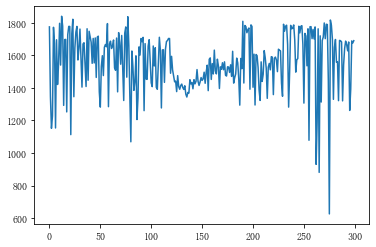

In [19]:
with open('Trytest/{}/progress.txt'.format(t)) as file:
    result = pd.read_csv(file, sep='\t')
    
plt.plot(result['AverageEpRet'])

(0, 1000000.0)

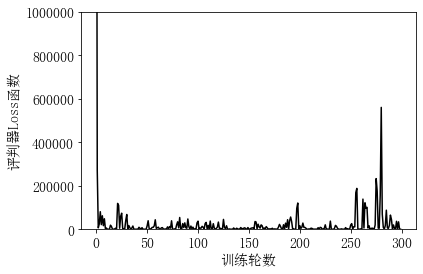

In [20]:
with open('Trytest/{}/progress.txt'.format(t)) as file:
    result = pd.read_csv(file, sep='\t')
    
plt.plot(result['LossV'], 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'训练轮数', fontsize=14)
plt.ylabel(u'评判器Loss函数', fontsize=14)
plt.ylim([0,1e6])
# plt.savefig('评判器Loss函数', dpi=300, bbox_inches='tight')

Text(0, 0.5, '行动器Loss函数')

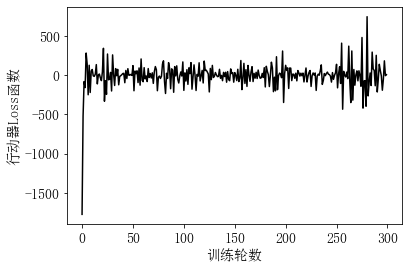

In [21]:
with open('Trytest/{}/progress.txt'.format(t)) as file:
    result = pd.read_csv(file, sep='\t')
    
plt.plot(result['LossPi'], 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(u'训练轮数', fontsize=14)
plt.ylabel(u'行动器Loss函数', fontsize=14)
# plt.ylim([-500, 500])
# plt.savefig('行动器Loss函数', dpi=300, bbox_inches='tight')

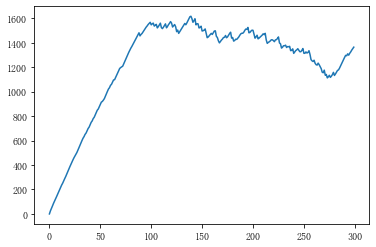

In [9]:
with open('Trytest/{}/progress.txt'.format(t)) as file:
    result = pd.read_csv(file, sep='\t')
    
plt.plot(result['AverageVVals'])